In [72]:
import wannierberri

In [73]:
import os

from matplotlib import pyplot as plt
import ray
import scipy
import wannierberri as wberri
import numpy as np
from termcolor import cprint

import warnings
import wannierberri as wb 
tested_version = '1.0.5'
if wb.__version__ != tested_version:
    warnings.warn(f'This tutorial was tested with version {tested_version} of wannierberri')

from wannierberri.parallel import Parallel

from pathlib import Path
path_data = Path("/Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1")  # adjust path if needed to point to the data in the tests fo wannier-berri repository
assert os.path.exists(path_data), f"Path {path_data} does not exist"

results_path = {}
results_grid = {}

# We do all calculations for three cases: 
#   1. With all magnetic symmetries (include_TR=True)
#   2. With only the spacegroup symmetries that preserve the magnetic order (include_TR=False)
#   3. Without any symmetries (include_TR=None)

include_TR_list = [True, False, None]  # None means no symmetry

try:
    ray.shutdown()
except:
    pass
parallel = Parallel(ray_init={"num_gpus": 0}) # use of gpus is not tested

/var/folders/z_/rt1ygshx103gv6f2nm5ws1wm0000gn/T/ipykernel_51958/3364966191.py:14: UserWarning: This tutorial was tested with version 1.0.5 of wannierberri
  warnings.warn(f'This tutorial was tested with version {tested_version} of wannierberri')


initializing ray with  {'num_gpus': 0, 'num_cpus': None}


2025-02-18 13:09:22,809	INFO worker.py:1841 -- Started a local Ray instance.


In [74]:
system_WS2 = wberri.w90files.Wannier90data(seedname=str("/Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2"),readfiles=("win","eig", "amn", "mmn",)) 

kwargs for win are {}
kwargs for eig are {'read_npz': True, 'write_npz': True, 'selected_bands': None}
calling w90 file with /Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2, eig, tags=['data'], read_npz=True, write_npz=True, kwargs={}
kwargs for amn are {'read_npz': True, 'write_npz': True, 'selected_bands': None}
calling w90 file with /Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2, amn, tags=['data'], read_npz=True, write_npz=True, kwargs={'npar': 8}
apply_window amn, selected_bands=None
kwargs for mmn are {'read_npz': True, 'write_npz': True, 'selected_bands': None}
calling w90 file with /Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2, mmn, tags=['data', 'neighbours', 'G'], read_npz=True, write_npz=True, kwargs={'npar': 8}
creating CheckPoint_bare


In [75]:
from irrep.spacegroup import SpaceGroup
from wannierberri.wannierise.projections import Projection


In [76]:
import tbmodels

In [77]:
shared_dir = "/Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/"
tbmodel = tbmodels.Model.from_wannier_files(hr_file=shared_dir+"ws2_hr.dat",
                                            wsvec_file=f'{shared_dir}/ws2_wsvec.dat',
                                            win_file=f'{shared_dir}/ws2.win',
                                            
                                            )

In [78]:
wberritbmodel = wberri.System_TBmodels(tbmodel=tbmodel)

R=0 found at position(s) [[21]]
Real-space lattice:
 [[ 3.18996822  0.          0.        ]
 [-1.59498411  2.76259352  0.        ]
 [ 0.          0.         14.82606093]]
Number of wannier functions: 22
Number of R points: 43
Recommended size of FFT grid [9 9 1]
Reading the system from TBmodels finished successfully


In [79]:
import copy

In [80]:
coords = ((0.66512066, 0.33024131, 0.        ),(0.33031508, 0.66063017, 0.11322686),(0.33031508, 0.66063017, 0.88677314))

In [81]:
coords = (( 0.6666666660,  0.33333333330, 0.),(0.33333333330,   0.6666666660,   0.1056832311), (0.33333333330,   0.6666666660   ,-0.1056832311))

In [82]:
from yambopy import * 
lat_k = YamboLatticeDB.from_db_file(folder=f'{shared_dir}/../nscf-6x6x1/out/ws2.save/SAVE', Expand=False)
nnkp_kgrid = tb_Monkhorst_Pack([6,6,1],lat_k)
nnkp_kgrid.generate()


In [83]:
# system_WS2=wberri.System_tb(tb_file='/Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2_hr.dat',berry=False, use_ws=False)
system_WS2_sym_new=copy.deepcopy(wberritbmodel)
spacegroup = SpaceGroup(cell=(system_WS2_sym_new.real_lattice, np.array(coords), [74,16,16]),magmom=[0,0,0], include_TR=True, spinor=True)
symmetrizer = wberri.symmetry.sawf.SymmetrizerSAWF().set_spacegroup(spacegroup).set_D_wann_from_projections(projections=[ ([coords[0]], "d"), (coords[1:], "sp3") ],kpoints=nnkp_kgrid.k)
# system_WS2_sym_new.symmetrize2(symmetrizer)


calculating Wannier functions for d at [(0.666666666, 0.3333333333, 0.0)]
calculating Wannier functions for sp3 at ((0.3333333333, 0.666666666, 0.1056832311), (0.3333333333, 0.666666666, -0.1056832311))
len(D_wann_list) = 2
D.shape [(0, 24, 10, 10), (0, 24, 16, 16)]
num_wann 26
D_wann_block_indices [[ 0 10]
 [10 26]]


In [84]:
symmetrizer = wberri.symmetry.sawf.SymmetrizerSAWF().set_spacegroup(spacegroup)


In [85]:
symmetrizer.kpoints_all = None

In [86]:
from irrep.bandstructure import BandStructure

In [87]:
spacegroup.get_irreps_from_table(kpname='GM',K=[0,0,0])

{'-GM7': {1: np.complex128(2+0j),
  2: np.complex128(-2+0j),
  3: np.complex128(-2+0j),
  4: np.complex128(0j),
  5: np.complex128(0j),
  6: np.complex128(0j),
  7: np.complex128(0j),
  8: np.complex128(0j),
  9: np.complex128(0j),
  10: np.complex128(0j),
  11: np.complex128(0j),
  12: np.complex128(0j)},
 '-GM8': {1: np.complex128(2+0j),
  2: np.complex128(1+0j),
  3: np.complex128(1+0j),
  4: np.complex128(0j),
  5: np.complex128(-1.73205+0j),
  6: np.complex128(-1.73205+0j),
  7: np.complex128(0j),
  8: np.complex128(0j),
  9: np.complex128(0j),
  10: np.complex128(0j),
  11: np.complex128(0j),
  12: np.complex128(0j)},
 '-GM9': {1: np.complex128(2+0j),
  2: np.complex128(1+0j),
  3: np.complex128(1+0j),
  4: np.complex128(0j),
  5: np.complex128(1.73205+0j),
  6: np.complex128(1.73205+0j),
  7: np.complex128(0j),
  8: np.complex128(0j),
  9: np.complex128(0j),
  10: np.complex128(0j),
  11: np.complex128(0j),
  12: np.complex128(0j)}}

In [88]:
bandstructure = BandStructure(code='espresso',   # to work with VASP or abinit please refer to the documentation of irrep
                            prefix=str(path_data / "out/ws2"),
                            Ecut=100,
                            normalize=True,
                            magmom=[[0,0,0],[0,0,0],[0,0,0]],  # set the magnetic moments for a magnetic system (units do not matter)
                            include_TR=True,degen_thresh=1e-4,
                            trans_thresh=1e-4,
                            calculate_traces=True
                            )

In [89]:
kpts = nnkp_kgrid.k.copy().tolist()

In [90]:
from irrep import kpoint

In [91]:
class KPointWrapper:
    def __init__(self, original_kpoint, new_k):
        for attr, value in vars(original_kpoint).items():
            setattr(self, attr, value)
        self.K = new_k

In [92]:
new_kpoints = np.array([[ 0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.16666667,  0.       ],
       [ 0.16666667, -0.16666667,  0.       ],
       [-0.16666667,  0.       ,  0.       ],
       [ 0.       , -0.16666667,  0.       ],
       [-0.16666667,  0.16666667,  0.       ],
       [ 0.16666667,  0.       ,  0.       ],
       [ 0.       ,  0.33333333,  0.       ],
       [ 0.33333333, -0.33333333,  0.       ],
       [-0.33333333,  0.       ,  0.       ],
       [ 0.       , -0.33333333,  0.       ],
       [-0.33333333,  0.33333333,  0.       ],
       [ 0.33333333,  0.       ,  0.       ],
       [ 0.       , -0.5      ,  0.       ],
       [-0.5      ,  0.5      ,  0.       ],
       [ 0.5      ,  0.       ,  0.       ],
       [ 0.16666667,  0.16666667,  0.       ],
       [-0.16666667,  0.33333333,  0.       ],
       [ 0.16666667, -0.33333333,  0.       ],
       [-0.33333333,  0.16666667,  0.       ],
       [-0.16666667, -0.16666667,  0.       ],
       [ 0.33333333, -0.16666667,  0.       ],
       [ 0.16666667,  0.33333333,  0.       ],
       [-0.16666667,  0.5      ,  0.       ],
       [ 0.33333333, -0.5      ,  0.       ],
       [-0.5      ,  0.16666667,  0.       ],
       [-0.33333333, -0.16666667,  0.       ],
       [ 0.5      , -0.33333333,  0.       ],
       [-0.16666667, -0.33333333,  0.       ],
       [ 0.16666667, -0.5      ,  0.       ],
       [-0.33333333,  0.5      ,  0.       ],
       [ 0.5      , -0.16666667,  0.       ],
       [ 0.33333333,  0.16666667,  0.       ],
       [-0.5      ,  0.33333333,  0.       ],
       [ 0.33333333,  0.33333333,  0.       ],
       [-0.33333333,  0.66666667,  0.       ]])

In [93]:
# Create the properly ordered list of KPointWrapper objects
kpoint_list = [KPointWrapper(bandstructure.kpoints[i], new_kpoints[i]) for i in range(len(new_kpoints))]

# Assign the sorted list back to bandstructure
bandstructure.kpoints = kpoint_list


In [94]:
dmn = bandstructure.get_dmn(grid=(6,6,1), degen_thresh=1e-6,unitary=True)

mpgrid = [6 6 1], 36
 [[3.35529977e-17-3.30246896e-18j]] 
 symm_matrix: block 64:65 of 65
 [[-9.87564203e-15-0.63516425j]] 
 symm_matrix: block 64:65 of 65
 [[-0.02605374-0.77193755j]] 
 symm_matrix: block 64:65 of 65
 [[-4.97735711e-16-7.59095043e-15j]] 
 symm_matrix: block 64:65 of 65
 [[4.43909652e-17+0.63516425j]] 
 symm_matrix: block 64:65 of 65
 [[0.02605374+0.77193755j]] 
 symm_matrix: block 64:65 of 65
 [[4.5890226e-16+7.59877886e-15j]] 
 symm_matrix: block 64:65 of 65
 [[-9.86755784e-15+0.63516425j]] 
 symm_matrix: block 64:65 of 65
 [[0.02605374+0.77193755j]] 
 symm_matrix: block 64:65 of 65
 [[1.05311254e-16+0.55849349j]] 
 symm_matrix: block 64:65 of 65
 [[-0.70585934-0.43571507j]] 
 symm_matrix: block 64:65 of 65
 [[-7.99233843e-17-0.53352732j]] 
 symm_matrix: block 64:65 of 65
 [[-0.70787273+0.46288746j]] 
 symm_matrix: block 64:65 of 65
 [[1.96602371e-17+0.55849349j]] 
 symm_matrix: block 64:65 of 65
 [[-0.70585934-0.43571507j]] 
 symm_matrix: block 64:65 of 65
 [[1.1730

In [95]:
symmetrizer.from_irrep(bandstructure=bandstructure)

mpgrid = [6 6 1], 36
 [[3.35529977e-17-3.30246896e-18j]] 
 symm_matrix: block 64:65 of 65
 [[-9.87564203e-15-0.63516425j]] 
 symm_matrix: block 64:65 of 65
 [[-0.02605374-0.77193755j]] 
 symm_matrix: block 64:65 of 65
 [[-4.97735711e-16-7.59095043e-15j]] 
 symm_matrix: block 64:65 of 65
 [[4.43909652e-17+0.63516425j]] 
 symm_matrix: block 64:65 of 65
 [[0.02605374+0.77193755j]] 
 symm_matrix: block 64:65 of 65
 [[4.5890226e-16+7.59877886e-15j]] 
 symm_matrix: block 64:65 of 65
 [[-9.86755784e-15+0.63516425j]] 
 symm_matrix: block 64:65 of 65
 [[0.02605374+0.77193755j]] 
 symm_matrix: block 64:65 of 65
 [[1.05311254e-16+0.55849349j]] 
 symm_matrix: block 64:65 of 65
 [[-0.70585934-0.43571507j]] 
 symm_matrix: block 64:65 of 65
 [[-7.99233843e-17-0.53352732j]] 
 symm_matrix: block 64:65 of 65
 [[-0.70787273+0.46288746j]] 
 symm_matrix: block 64:65 of 65
 [[1.96602371e-17+0.55849349j]] 
 symm_matrix: block 64:65 of 65
 [[-0.70585934-0.43571507j]] 
 symm_matrix: block 64:65 of 65
 [[1.1730

In [96]:
spacegroup.get_irreps_from_table(kpname='GM',K=[0,0,0])

{'-GM7': {1: np.complex128(2+0j),
  2: np.complex128(-2+0j),
  3: np.complex128(-2+0j),
  4: np.complex128(0j),
  5: np.complex128(0j),
  6: np.complex128(0j),
  7: np.complex128(0j),
  8: np.complex128(0j),
  9: np.complex128(0j),
  10: np.complex128(0j),
  11: np.complex128(0j),
  12: np.complex128(0j)},
 '-GM8': {1: np.complex128(2+0j),
  2: np.complex128(1+0j),
  3: np.complex128(1+0j),
  4: np.complex128(0j),
  5: np.complex128(-1.73205+0j),
  6: np.complex128(-1.73205+0j),
  7: np.complex128(0j),
  8: np.complex128(0j),
  9: np.complex128(0j),
  10: np.complex128(0j),
  11: np.complex128(0j),
  12: np.complex128(0j)},
 '-GM9': {1: np.complex128(2+0j),
  2: np.complex128(1+0j),
  3: np.complex128(1+0j),
  4: np.complex128(0j),
  5: np.complex128(1.73205+0j),
  6: np.complex128(1.73205+0j),
  7: np.complex128(0j),
  8: np.complex128(0j),
  9: np.complex128(0j),
  10: np.complex128(0j),
  11: np.complex128(0j),
  12: np.complex128(0j)}}

In [97]:
symmetrizer.set_D_wann_from_projections(projections=[ ([coords[0]], "d"), (coords[1:], "sp3") ],)

calculating Wannier functions for d at [(0.666666666, 0.3333333333, 0.0)]
calculating Wannier functions for sp3 at ((0.3333333333, 0.666666666, 0.1056832311), (0.3333333333, 0.666666666, -0.1056832311))
len(D_wann_list) = 2
D.shape [(7, 24, 10, 10), (7, 24, 16, 16)]
num_wann 26
D_wann_block_indices [[ 0 10]
 [10 26]]


In [100]:
symmetrizer.D_wann

[]

In [67]:
symmetrizer.D_wann_full_matrix()[:,:,4:,4:].shape

(7, 24, 22, 22)

In [99]:
symmetrizer.set_D_wann(symmetrizer.D_wann_full_matrix()[:,:,4:,4:])

D.shape [(7, 24, 22, 22)]
num_wann 22
D_wann_block_indices [[ 0 22]]


In [101]:
print(symmetrizer.NK)
print(symmetrizer.NB )
print(symmetrizer.num_wann)

36
65
22


In [102]:
w90_data_list = {}
wberri.symmetry.sawf.SymmetrizerSAWF()

for includeTR in include_TR_list:
    cprint (f"include_TR = {includeTR}", "green", attrs=["bold"])
    w90data=wberri.w90files.Wannier90data(seedname=str(path_data/"ws2"),readfiles=('win','eig', 'mmn', 'amn', 'uhu', 'spn'))    
    cprint (f"creating dmn", "blue", attrs=["bold"])
    if includeTR is not None:
        sitesym = True
        symmetrizer = symmetrizer
        w90data.set_symmetrizer(symmetrizer)
        print (f"eig is symmetric within the accuracy of : {symmetrizer.check_eig(w90data.eig)}")
        # print (f"amn is symmetric within the accuracy of : {symmetrizer.check_amn(w90data.amn, warning_precision=1e-4,ignore_lower_bands=3)}")   
    else:
        sitesym = False

    cprint (f"wannierising", "blue", attrs=["bold"])
    #aidata.apply_outer_window(win_min=-8,win_max= 100 )
    froz_max=30
    w90data.wannierise( init = "amn",
                    print_progress_every=100,
                    num_iter=5000,
                    conv_tol=1e-8,
                    mix_ratio_z=1.0,
                    localise=True,
                    sitesym=sitesym,
                    num_wann=22,
                    )
    
    w90_data_list[includeTR] = w90data

include_TR = True
kwargs for win are {}
kwargs for eig are {'read_npz': True, 'write_npz': True, 'selected_bands': None}
calling w90 file with /Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2, eig, tags=['data'], read_npz=True, write_npz=True, kwargs={}
kwargs for mmn are {'read_npz': True, 'write_npz': True, 'selected_bands': None}
calling w90 file with /Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2, mmn, tags=['data', 'neighbours', 'G'], read_npz=True, write_npz=True, kwargs={'npar': 8}
kwargs for amn are {'read_npz': True, 'write_npz': True, 'selected_bands': None}
calling w90 file with /Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2, amn, tags=['data'], read_npz=True, write_npz=True, kwargs={'npar': 8}
apply_window amn, selected_bands=None
kwargs for uhu are {'formatted': False, 'read_npz': True, 'write_npz': False, 'selected_bands': None}
calling w90 file with /Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2, uHu, 

(pid=81532) /opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
(pid=81532)  will use numpy instead 
(pid=81532) 
(pid=81532)   warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n")
(pid=81533) 
(pid=81531) 
(pid=81538) 
(pid=81534) 
(pid=81537) 
(pid=81535) 
(pid=81536) 
(pid=81536) /opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw'  [repeated 7x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(pid=81536)  will use numpy instead  [repeated 7x across cluster]
(pid=81536)   warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n") [repeated 7x across

/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/wannierise/wannierise.py:216: UserWarning: The Wannier centers from the chk file and the Wannier centers from the wannierizer are not the same. diff = 2.1598433393504926
  warnings.warn(f"The Wannier centers from the chk file and the Wannier centers from the wannierizer are not the same. diff = {np.abs(wcc - wcc_chk).max()}")
/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/wannierise/wannierise.py:218: UserWarning: The Wannier spreads from the chk file and the Wannier spreads from the wannierizer are not the same. diff = 133.71867903174348
  warnings.warn(f"The Wannier spreads from the chk file and the Wannier spreads from the wannierizer are not the same. diff = {np.abs(spreads - spreads_chk).max()}")


reading /Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2.uHu : <Created on 13Feb2025 at 20:54:43>
----------
 uHu OK  
---------

kwargs for spn are {'read_npz': True, 'write_npz': False, 'selected_bands': None}
calling w90 file with /Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2, spn, tags=['data'], read_npz=True, write_npz=False, kwargs={}
----------
 SPN  
---------

using fortio to read
reading /Users/6179304/Developer/calculations/WS2/symm-wannier-6x6x1/ws2.spn : Created on 13Feb2025 at 20:53:51                            
----------
 SPN OK  
---------

creating CheckPoint_bare
creating dmn
eig is symmetric within the accuracy of : 0.0001757685324992469
wannierising
froz_min > froz_max, nothing will be frozen
####################################################################################################
starting WFs
----------------------------------------------------------------------------------------------------
wannier centers and spread

(raylet) WARNING: 40 PYTHON worker processes have been started on node: 0b5c0ea526505273e61709d6a3ead87f7211411b3fd121ad8e100797 with address: 127.0.0.1. This could be a result of using a large number of actors, or due to tasks blocked in ray.get() calls (see https://github.com/ray-project/ray/issues/3644 for some discussion of workarounds).


(pid=82959) 
(pid=82970) 
(pid=82973) 
(pid=82975) 
(pid=82974) 
(pid=82976) 
(pid=82978) 
(pid=82977) 
(pid=82985) 
(pid=82995) 
(pid=82995) /opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw'  [repeated 16x across cluster]
(pid=82995)  will use numpy instead  [repeated 16x across cluster]
(pid=82995)   warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n") [repeated 16x across cluster]
(pid=82999) 
(pid=82997) 


In [103]:

systems = {}
for includeTR in include_TR_list:
    cprint (f"include_TR = {includeTR}", "green", attrs=["bold"])
    systems[includeTR]=wberri.system.System_w90(w90data= w90_data_list[includeTR], berry=True, transl_inv_JM=True, transl_inv_MV=False, wcc_phase_fin_diff=False)
    if includeTR is not None:
        systems[includeTR].symmetrize2(w90_data_list[includeTR].symmetrizer)

include_TR = True


/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/system/system_w90.py:160: UserWarning: converting convention II to convention I is not recommended.Better use 'wcc_phase_fin_dif=True' or `transl_inv_JM=True`
  warnings.warn("converting convention II to convention I is not recommended."


expjphase1 (22, 22, 8)


/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n")
/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n")
/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n")
/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.

irvec_new_all shape (43,)
using ws_dist for Ham
using ws_dist for AA
Real-space lattice:
 [[ 3.18996822  0.          0.        ]
 [-1.59498411  2.76259352  0.        ]
 [ 0.          0.         14.82606092]]
Number of wannier functions: 22
Number of R points: 51
Recommended size of FFT grid [6 6 1]
Wannier Centers cart (raw):
 [[ 1.06332246e+00  9.18869523e-01  1.90873166e-08]
 [ 1.06332324e+00  9.18870060e-01  2.91919470e-07]
 [ 1.59499212e+00  1.22779424e+00  5.32977677e-06]
 [ 1.59499773e+00  1.22779460e+00  1.81728248e-06]
 [ 1.59496506e+00  6.13335175e-01  1.24134468e-05]
 [ 1.59497048e+00  6.13376329e-01 -1.68090566e-05]
 [ 3.05236989e-01  2.15955266e+00  9.14622838e-01]
 [ 3.05083898e-01  2.15914790e+00  9.14911277e-01]
 [ 1.51264684e-01  1.67093878e+00  2.94178760e-01]
 [ 1.51969825e-01  1.67105997e+00  2.97153176e-01]
 [-7.51167038e-02  1.91446065e+00  3.03122853e-01]
 [-7.62140442e-02  1.91558238e+00  3.03050830e-01]
 [-3.50590309e-01  1.50486554e+00  9.15530509e-01]
 [-3.509

/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/system/system_R.py:416: UserWarning: the maximal value of diagonal position matrix elements after conversion of conventions with transl_inv_MV=False, transl_inv_JM=True is 1.0134763086699423.This may signal a problem
 [[ 1.01347472e+00+0.j  1.01347631e+00+0.j  8.30006317e-08+0.j
   4.17434882e-08+0.j -1.03326482e-07+0.j -1.13767423e-07+0.j
   9.70181961e-04+0.j  9.74254391e-04+0.j  7.26128503e-03+0.j
   7.24456155e-03+0.j -2.86359612e-02+0.j -2.85186135e-02+0.j
  -8.81209006e-04+0.j -8.84781895e-04+0.j  2.88290332e-02+0.j
   2.86889667e-02+0.j  8.91760872e-04+0.j  8.97198223e-04+0.j
  -9.60983047e-04+0.j -9.64831911e-04+0.j -7.13826256e-03+0.j
  -7.13884286e-03+0.j]
 [-2.44499012e-06+0.j -8.30929107e-06+0.j  1.45330201e-06+0.j
   1.54822583e-06+0.j  4.87899700e-06+0.j  4.59416718e-06+0.j
   2.39557250e-03+0.j  2.39117808e-03+0.j  5.94129055e-04+0.j
   5.72347632e-04+0.j  2.42613350e-02+0.j  2.41146137e-02+0.j
 

include_TR = False
expjphase1 (22, 22, 8)


/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n")
/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n")
/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n")
/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.

irvec_new_all shape (43,)
using ws_dist for Ham
using ws_dist for AA
Real-space lattice:
 [[ 3.18996822  0.          0.        ]
 [-1.59498411  2.76259352  0.        ]
 [ 0.          0.         14.82606092]]
Number of wannier functions: 22
Number of R points: 51
Recommended size of FFT grid [6 6 1]
Wannier Centers cart (raw):
 [[ 1.06332246e+00  9.18869523e-01  1.90873166e-08]
 [ 1.06332324e+00  9.18870060e-01  2.91919470e-07]
 [ 1.59499212e+00  1.22779424e+00  5.32977677e-06]
 [ 1.59499773e+00  1.22779460e+00  1.81728248e-06]
 [ 1.59496506e+00  6.13335175e-01  1.24134468e-05]
 [ 1.59497048e+00  6.13376329e-01 -1.68090566e-05]
 [ 3.05236989e-01  2.15955266e+00  9.14622838e-01]
 [ 3.05083898e-01  2.15914790e+00  9.14911277e-01]
 [ 1.51264684e-01  1.67093878e+00  2.94178760e-01]
 [ 1.51969825e-01  1.67105997e+00  2.97153176e-01]
 [-7.51167038e-02  1.91446065e+00  3.03122853e-01]
 [-7.62140442e-02  1.91558238e+00  3.03050830e-01]
 [-3.50590309e-01  1.50486554e+00  9.15530509e-01]
 [-3.509

/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n")
/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n")
/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.warn(f"error importing  `pyfftw` : {err} \n will use numpy instead \n")
/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/__init__.py:25: UserWarning: error importing  `pyfftw` : No module named 'pyfftw' 
 will use numpy instead 

  warnings.

irvec_new_all shape (43,)
using ws_dist for Ham
using ws_dist for AA
Real-space lattice:
 [[ 3.18996822  0.          0.        ]
 [-1.59498411  2.76259352  0.        ]
 [ 0.          0.         14.82606092]]
Number of wannier functions: 22
Number of R points: 51
Recommended size of FFT grid [6 6 1]


In [104]:
path_kpoints = Path([[[  0.0,  0.0,  0.0],'$\Gamma$'],
                     [[0.5, 0.0,  0.0],'M'],  
              [[  1/3,  1/3,  0.0],'K'],
              [[  0.0,  0.0,  0.0],'$\Gamma$']],[npoints,npoints,npoints-1] )
klist = path_kpoints.get_klist()

NameError: name 'npoints' is not defined

In [ ]:
results_path = {}

for includeTR in include_TR_list:
    cprint (f"include_TR = {includeTR}", "green", attrs=["bold"])
    system = systems[includeTR]
    # system.set_symmetry(spacegroup=bandstructure.spacegroup)
    tabulators = { "Energy": wberri.calculators.tabulate.Energy(),
                }


    tab_all_path = wberri.calculators.TabulatorAll(
                        tabulators,
                        ibands=np.arange(0,22),
                        mode="path"
                            )

    # all kpoints given in reduced coordinates
    path=wberri.Path(system,
                    k_nodes=[[  0.0,  0.0,  0.0],
               [0.5, 0.0,  0.0],  
              [  1/3,  1/3,  0.0],
              [  0.0,  0.0,  0.0]
                            ] , #  G
                    labels=["G","M","K","G"],
                    length=200 )   # length [ Ang] ~= 2*pi/dk

    results_path[includeTR]=wberri.run(system,
                    parallel=parallel,
                    grid=path,
                    calculators={"tabulate" : tab_all_path},
                    print_Kpoints=False)

include_TR = True
Starting run()
Using the follwing calculators : 
############################################################

 'tabulate'  :  <wannierberri.calculators.tabulate.TabulatorAll object at 0x13f028be0>  : 
    TabulatorAll - a pack of all k-resolved calculators (Tabulators)
    
 Includes the following tabulators : 
--------------------------------------------------
 "Energy" : <wannierberri.calculators.tabulate.Energy object at 0x13f6abbe0> : calculator not described

--------------------------------------------------

############################################################
Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.tabulate.TabulatorAll object at 0x13f028be0>
All calculators are compatible
Symmetrization switched off for Path
Grid is regular
The set of k points is a Path() with 100 points and labels {0: 'G', 36: 'M', 57: 'K', 99: 'G'}
generating K_list
Done 
Done, sum of weights:100.0
processing 100 K points

/opt/miniconda3/envs/wannierberri/lib/python3.10/site-packages/wannierberri/grid/path.py:163: UserWarning: symmetry is not used for a tabulation along path
  warnings.warn("symmetry is not used for a tabulation along path")


time for processing    100 K-points on   8 processes:     0.2040 ; per K-point          0.0020 ; proc-sec per K-point          0.0163
time1 =  0.0032777786254882812
Totally processed 100 K-points 
run() finished
include_TR = False
Starting run()
Using the follwing calculators : 
############################################################

 'tabulate'  :  <wannierberri.calculators.tabulate.TabulatorAll object at 0x14d2b60e0>  : 
    TabulatorAll - a pack of all k-resolved calculators (Tabulators)
    
 Includes the following tabulators : 
--------------------------------------------------
 "Energy" : <wannierberri.calculators.tabulate.Energy object at 0x14a329150> : calculator not described

--------------------------------------------------

############################################################
Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.tabulate.TabulatorAll object at 0x14d2b60e0>
All calculators are compatible
Symmetriz

include_TR = True
include_TR = False
include_TR = None


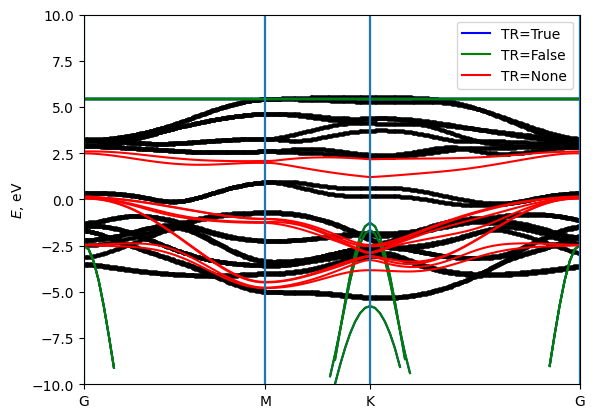

In [ ]:
# plot the bands and compare with pw
EF = -5.4606

A = np.loadtxt(path_data / "ws2_band.dat")
bohr_ang = scipy.constants.physical_constants['Bohr radius'][0] / 1e-10
alatt = 3.18996822/bohr2ang
A[:,0]*= 2*np.pi/alatt
A[:,1] = A[:,1] - EF
plt.scatter(A[:,0], A[:,1], c="black", s=5)

colors = ["red", "green","blue"]
for includeTR in include_TR_list:
    cprint (f"include_TR = {includeTR}", "green", attrs=["bold"])

    path_result = results_path[includeTR].results["tabulate"]

    path_result.plot_path_fat(path,
                quantity=None,
                # save_file="Fe_bands.pdf",
                Eshift=EF,
                Emin=-10, Emax=10,
                iband=None,
                mode="fatband",
                fatfactor=20,
                cut_k=False,
                linecolor=colors.pop(),
                close_fig=False,
                show_fig=False,
                label=f"TR={includeTR}"
                )

plt.ylim(-10, 10)
plt.hlines(froz_max-EF, 0, A[-1,0], linestyles="dashed")
plt.legend()
